# Red Calibration Worksheet

## 1. Setup
This section load python objects and variables please check the ```cam``` variable

### 1.1 Load python objects
Loads ```scope``` and ```lamp``` python objects for reading sekonic and communication with the lamp

In [1]:
cam = "http://192.168.2.224/video_feed"
whiteTreshold = 150

%run calibration_setup.ipynb

### 1.2 Connect to lamp
Lamp needs to be closed before it can be opened again.
If you dont know the serial port where the lamp is connected use the Find COM port section
1st You need to setup sekonic and feedback camera (the areas where the data will be read, 1st -green value is set up so it would be possibel to get dUV - sign location), then close the lamp and start again with the scope objects

In [3]:
lamp1.close()

NameError: name 'lamp1' is not defined

In [4]:
lamp1 = apollo_device(ComPort='COM6')
lamp1.getId()
lamp1.macId = lamp1.macId.replace(":","")
lamp1.macId

'782184456C74'

In [6]:
lamp1.color = [200,50,50,500,0]
lamp1.update()

#### [Optional] Find COM port

In [9]:
# Get COM port list
import serial.tools.list_ports

com_ports = list(serial.tools.list_ports.comports())

for port, desc, hwid in com_ports:
    print(str(port)+" "+str(desc))

COM5 USB Serial Port (COM5)
COM6 USB Serial Port (COM6)


### 1.3 Set Sekonic camera areas
Set the area where to "read" the Tcp, dUV and lux variables
Once the object is initalized tune the paramters and test by ```update()```
To save the paramteres use the Setup below to generate the ```saved_string``` and copy and paste it into funtion paramter and save the workbook

In [5]:
Brightness = scope(saved_string="self.slider_h.value = (231, 390)\nself.slider_v.value = (375, 433)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [9]:
Brightness.update()

4060

In [10]:
dUV = scope(saved_string="self.slider_h.value = (251, 444)\nself.slider_v.value = (289, 353)\nself.minus_comp.value = True\nself.offset_x.value = -80\nself.offset_y.value = 2\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('20.0', '0,0'), ('0.6', '0.0'), ('0.8', '0.0')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [11]:
dUV.update()

-0.0286

In [12]:
Kelvin = scope(saved_string="self.slider_h.value = (259, 417)\nself.slider_v.value = (217, 275)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('G', '6')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [14]:
Kelvin.update()

5157

#### Setup

In [15]:
Brightness.save_string()

"self.slider_h.value = (231, 390)\nself.slider_v.value = (375, 433)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.')]) \n"

In [16]:
dUV.save_string()

"self.slider_h.value = (251, 444)\nself.slider_v.value = (289, 353)\nself.minus_comp.value = True\nself.offset_x.value = -80\nself.offset_y.value = 2\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('20.0', '0,0'), ('0.6', '0.0'), ('0.8', '0.0')]) \n"

In [17]:
Kelvin.save_string()

"self.slider_h.value = (259, 417)\nself.slider_v.value = (217, 275)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('G', '6')]) \n"

# Measure

In [72]:
lamp1.close()

In [25]:
lamp1 = apollo_device(ComPort='COM6',SekBrightnes=Brightness, SekDuv=dUV, SekKelvin=Kelvin)
lamp1.getId()
lamp1.macId = lamp1.macId.replace(":","")
lamp1.macId

'782184456C74'

In [48]:
out = []
def measure(temp = 35):
    print("Measuring for: "+str(i))
    lamp1.send(("R "+str(temp)+"\n").encode('utf-8'))
    lamp1.read(debug=False)
    answer = eval('{'+lamp1.lastValAsJsonString[1:-1]+'}')
    while answer['ready'] == False:
        lamp1.send(("R "+str(temp)+"\n").encode('utf-8'))
        lamp1.read(debug=False)
        answer = eval('{'+lamp1.lastValAsJsonString[1:-1]+'}')
        print('\"ready\":'+str(answer['ready'])+',\"current_temp\":'+str(answer['tempC']))
        time.sleep(5)
    time.sleep(3)
    lamp1.send(("R "+str(temp)+"\n").encode('utf-8'))
    lamp1.read(debug=False)
    answer = eval('{'+lamp1.lastValAsJsonString[1:-1]+'}')
    lux = Brightness.update()
    answerJson = "{"+'\"ready\":'+str(answer['ready'])+',\"current_temp\":'+str(answer['tempC'])+",\"brightness\":"+str(lux)+"}"
    print(answerJson)
    return(answerJson)

for i in range(55):
    out.append(eval(measure(temp = 80-i)))

Measuring for: 0
"ready":False,"current_temp":31.5
"ready":False,"current_temp":31.5
"ready":False,"current_temp":31.5
"ready":False,"current_temp":31.625
"ready":False,"current_temp":31.875
"ready":False,"current_temp":32.5
"ready":False,"current_temp":33.25
"ready":False,"current_temp":34.125
"ready":False,"current_temp":35.875
"ready":False,"current_temp":35.875
"ready":False,"current_temp":36.5
"ready":False,"current_temp":37.25
"ready":False,"current_temp":38.125
"ready":False,"current_temp":39.5
"ready":False,"current_temp":39.75
"ready":False,"current_temp":40.25
"ready":False,"current_temp":41.625
"ready":False,"current_temp":41.875
"ready":False,"current_temp":42.25
"ready":False,"current_temp":43.125
"ready":False,"current_temp":44.375
"ready":False,"current_temp":44.75
"ready":False,"current_temp":45.625
"ready":False,"current_temp":45.875
"ready":False,"current_temp":46.0
"ready":False,"current_temp":47.625
"ready":False,"current_temp":47.875
"ready":False,"current_temp":48

In [47]:
out3 = out

In [41]:
out1

[{'ready': True, 'current_temp': 30.5, 'brightness': 8910},
 {'ready': True, 'current_temp': 30.75, 'brightness': 8750},
 {'ready': True, 'current_temp': 31.5, 'brightness': 8770},
 {'ready': True, 'current_temp': 32.5, 'brightness': 8750},
 {'ready': True, 'current_temp': 33.5, 'brightness': 8760},
 {'ready': True, 'current_temp': 34.625, 'brightness': 8550},
 {'ready': True, 'current_temp': 36.25, 'brightness': 8520},
 {'ready': True, 'current_temp': 37.5, 'brightness': 8520},
 {'ready': True, 'current_temp': 37.5, 'brightness': 8500},
 {'ready': True, 'current_temp': 38.5, 'brightness': 8450},
 {'ready': True, 'current_temp': 40.125, 'brightness': 8280},
 {'ready': True, 'current_temp': 41.5, 'brightness': 8290},
 {'ready': True, 'current_temp': 41.625, 'brightness': 8290},
 {'ready': True, 'current_temp': 42.5, 'brightness': 8210},
 {'ready': True, 'current_temp': 43.875, 'brightness': 8140},
 {'ready': True, 'current_temp': 44.625, 'brightness': 8120},
 {'ready': True, 'current_te

In [42]:
out2

[{'ready': True, 'current_temp': 25.0, 'brightness': 9070},
 {'ready': False, 'current_temp': 27.25, 'brightness': 9000},
 {'ready': True, 'current_temp': 27.25, 'brightness': 9010},
 {'ready': True, 'current_temp': 27.5, 'brightness': 8990},
 {'ready': True, 'current_temp': 28.75, 'brightness': 8950},
 {'ready': False, 'current_temp': 31.0, 'brightness': 8800},
 {'ready': False, 'current_temp': 32.5, 'brightness': 8830},
 {'ready': True, 'current_temp': 32.5, 'brightness': 8840},
 {'ready': True, 'current_temp': 32.5, 'brightness': 8820},
 {'ready': True, 'current_temp': 34.375, 'brightness': 8630},
 {'ready': False, 'current_temp': 36.125, 'brightness': 8600},
 {'ready': True, 'current_temp': 36.375, 'brightness': 8600},
 {'ready': True, 'current_temp': 37.0, 'brightness': 8560},
 {'ready': True, 'current_temp': 37.5, 'brightness': 8560},
 {'ready': True, 'current_temp': 39.375, 'brightness': 8390},
 {'ready': False, 'current_temp': 41.625, 'brightness': 8340},
 {'ready': False, 'cur

In [12]:
out3 = [{'ready': False, 'current_temp': 80.75, 'brightness': 9300},
 {'ready': False, 'current_temp': 75.25, 'brightness': 10800},
 {'ready': True, 'current_temp': 78.0, 'brightness': 9560},
 {'ready': False, 'current_temp': 78.0, 'brightness': 9570},
 {'ready': False, 'current_temp': 77.375, 'brightness': 9660},
 {'ready': False, 'current_temp': 76.375, 'brightness': 9790},
 {'ready': False, 'current_temp': 75.625, 'brightness': 9910},
 {'ready': False, 'current_temp': 73.625, 'brightness': 10100},
 {'ready': False, 'current_temp': 74.0, 'brightness': 10100},
 {'ready': False, 'current_temp': 71.625, 'brightness': 10300},
 {'ready': True, 'current_temp': 69.75, 'brightness': 10400},
 {'ready': False, 'current_temp': 67.0, 'brightness': 11600},
 {'ready': False, 'current_temp': 69.625, 'brightness': 10600},
 {'ready': False, 'current_temp': 69.125, 'brightness': 10500},
 {'ready': False, 'current_temp': 61.75, 'brightness': 11900},
 {'ready': False, 'current_temp': 65.625, 'brightness': 10800},
 {'ready': False, 'current_temp': 64.75, 'brightness': 10900},
 {'ready': False, 'current_temp': 64.375, 'brightness': 11000},
 {'ready': False, 'current_temp': 56.875, 'brightness': 12300},
 {'ready': False, 'current_temp': 63.5, 'brightness': 11100},
 {'ready': False, 'current_temp': 56.0, 'brightness': 12400},
 {'ready': False, 'current_temp': 59.875, 'brightness': 11400},
 {'ready': False, 'current_temp': 55.625, 'brightness': 12500},
 {'ready': False, 'current_temp': 58.75, 'brightness': 11500},
 {'ready': False, 'current_temp': 58.625, 'brightness': 11600},
 {'ready': False, 'current_temp': 56.0, 'brightness': 11700},
 {'ready': False, 'current_temp': 51.125, 'brightness': 12800},
 {'ready': False, 'current_temp': 50.0, 'brightness': 12800},
 {'ready': False, 'current_temp': 54.125, 'brightness': 12000},
 {'ready': False, 'current_temp': 48.125, 'brightness': 12900},
 {'ready': True, 'current_temp': 50.0, 'brightness': 12200},
 {'ready': False, 'current_temp': 50.625, 'brightness': 12200},
 {'ready': True, 'current_temp': 48.125, 'brightness': 12400},
 {'ready': False, 'current_temp': 49.875, 'brightness': 12400},
 {'ready': False, 'current_temp': 43.625, 'brightness': 13300},
 {'ready': True, 'current_temp': 45.0, 'brightness': 12800},
 {'ready': False, 'current_temp': 42.5, 'brightness': 13400},
 {'ready': False, 'current_temp': 41.5, 'brightness': 13400},
 {'ready': False, 'current_temp': 40.75, 'brightness': 13300},
 {'ready': False, 'current_temp': 40.375, 'brightness': 13300},
 {'ready': True, 'current_temp': 40.375, 'brightness': 13200},
 {'ready': True, 'current_temp': 39.0, 'brightness': 13600},
 {'ready': False, 'current_temp': 37.25, 'brightness': 13600},
 {'ready': True, 'current_temp': 37.25, 'brightness': 13600},
 {'ready': False, 'current_temp': 38.5, 'brightness': 13400},
 {'ready': True, 'current_temp': 35.0, 'brightness': 13900},
 {'ready': True, 'current_temp': 34.5, 'brightness': 13900},
 {'ready': True, 'current_temp': 33.375, 'brightness': 13900},
 {'ready': True, 'current_temp': 31.625, 'brightness': 14100},
 {'ready': True, 'current_temp': 31.0, 'brightness': 14100},
 {'ready': True, 'current_temp': 30.375, 'brightness': 14100},
 {'ready': True, 'current_temp': 28.625, 'brightness': 14100},
 {'ready': True, 'current_temp': 28.5, 'brightness': 14100},
 {'ready': True, 'current_temp': 27.25, 'brightness': 14200},
 {'ready': True, 'current_temp': 26.375, 'brightness': 14300}]

Plot 2 datasets

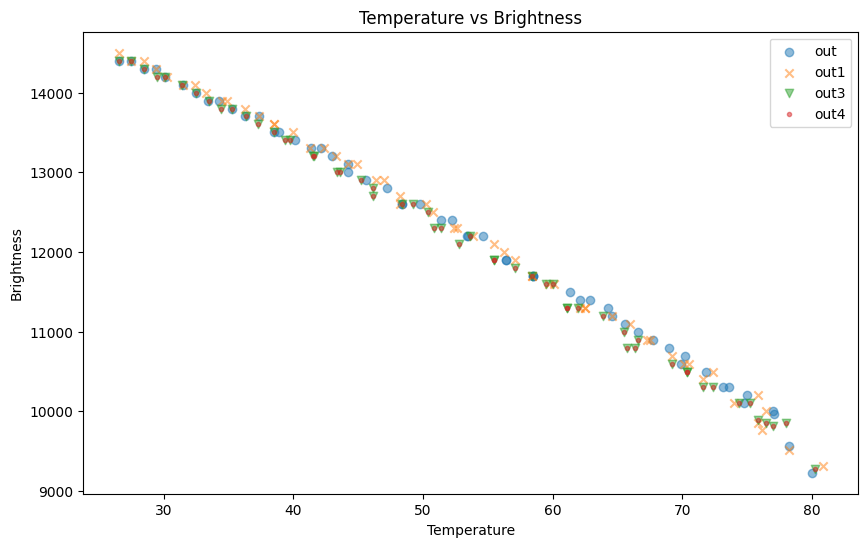

In [13]:
import matplotlib.pyplot as plt

# Extract temperature and brightness data
temp_out = [data["current_temp"] for data in out]
brightness_out = [data["brightness"] for data in out]

temp_out1 = [data["current_temp"] for data in out1]
brightness_out1 = [data["brightness"] for data in out1]

temp_out2 = [data["current_temp"] for data in out2]
brightness_out2 = [data["brightness"] for data in out2]

temp_out3 = [data["current_temp"] for data in out3]
brightness_out3 = [data["brightness"] for data in out3]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(temp_out, brightness_out, label='out', marker='o', alpha=0.5)
plt.scatter(temp_out1, brightness_out1, label='out1', marker='x', alpha=0.5)
plt.scatter(temp_out2, brightness_out2, label='out3', marker='v', alpha=0.5)
plt.scatter(temp_out2, brightness_out2, label='out4', marker='.', alpha=0.5)

# Add labels and a legend
plt.xlabel('Temperature')
plt.ylabel('Brightness')
plt.legend()

# Show the plot
plt.title('Temperature vs Brightness')
plt.show()

# Try fit a curve

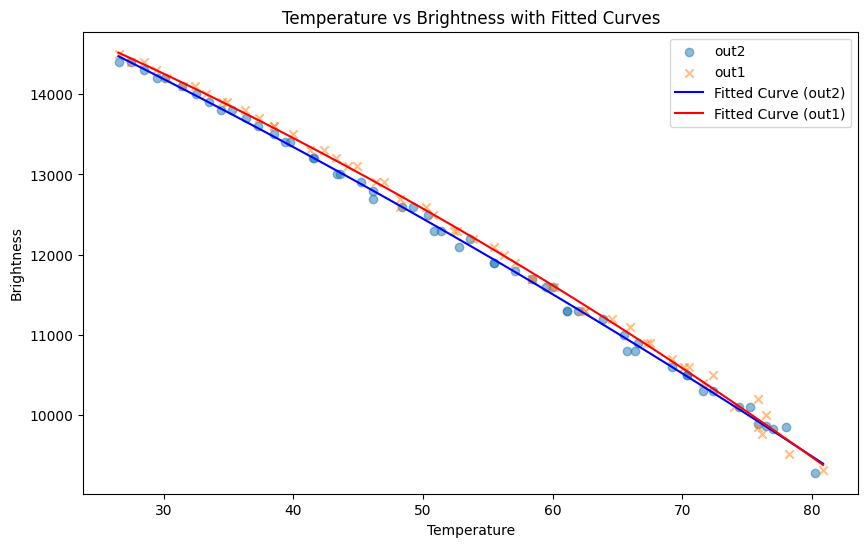

In [14]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Extract temperature and brightness data
temp_out2 = np.array([data["current_temp"] for data in out2])
brightness_out2 = np.array([data["brightness"] for data in out2])

temp_out1 = np.array([data["current_temp"] for data in out1])
brightness_out1 = np.array([data["brightness"] for data in out1])

# Define a polynomial function to fit the data
def polynomial_function(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the curve to the data for 'out'
params_out2, _ = curve_fit(polynomial_function, temp_out2, brightness_out2)

# Fit the curve to the data for 'out1'
params_out1, _ = curve_fit(polynomial_function, temp_out1, brightness_out1)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(temp_out2, brightness_out2, label='out2', marker='o', alpha=0.5)
plt.scatter(temp_out1, brightness_out1, label='out1', marker='x', alpha=0.5)

# Plot the fitted curves
x_range = np.linspace(min(temp_out2.min(), temp_out1.min()), max(temp_out2.max(), temp_out1.max()), 100)
plt.plot(x_range, polynomial_function(x_range, *params_out2), label='Fitted Curve (out2)', color='blue')
plt.plot(x_range, polynomial_function(x_range, *params_out1), label='Fitted Curve (out1)', color='red')

# Add labels and a legend
plt.xlabel('Temperature')
plt.ylabel('Brightness')
plt.legend()

# Show the plot
plt.title('Temperature vs Brightness with Fitted Curves')
plt.show()

In [52]:
params_out = params_out1

In [18]:
# Temperature at which you want to interpolate brightness (-20°C)
temperature_to_interpolate = -20.0

# Use the fitted parameters to interpolate brightness
interpolated_brightness = polynomial_function(temperature_to_interpolate, *params_out)

print(f'Interpolated Brightness at {temperature_to_interpolate}°C (out): {interpolated_brightness}')

Interpolated Brightness at -20.0°C (out): 17122.925277416864


Generate Arduino LUT variable

In [57]:
import numpy as np

# Define the temperature range (-20°C to 80°C in 10°C increments)
temperature_range = np.arange(-20, 81, 10)

# Initialize an empty Arduino-compatible LUT array
lut_array = []

# Calculate the maximum brightness multiplier for each temperature in the range
for temperature in temperature_range:
    brightness_multiplier = polynomial_function(temperature, *params_out)
    # Format the entry as max Red value at temperature
    lut_entry = f"{round(((17122/2+917)/brightness_multiplier)*2048)}, "
    lut_array.append(lut_entry)

# Create a formatted Arduino-compatible array
arduino_lut = "{"+''.join(lut_array)[:-2] + "}"

# Print the Arduino-compatible array
print("int red_lut[] = " + arduino_lut + ";")


int red_lut[] = {1134, 1162, 1198, 1242, 1296, 1362, 1443, 1544, 1671, 1834, 2048};


In [71]:
len(lut_array)

11

In [60]:
5800/polynomial_function(80, *params_out)

0.973384354805721

Write the last dataframe into file

In [40]:
import datetime

wbIndex = 0 # 0-5
wbRanges = [0,14,71,100,178,255]
tempIndex = wbRanges[wbIndex]

file_path = "Apollo"+str(lamp1.macId)+"_"+str(wbIndex)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".py"
df.to_csv(file_path, index=False)

Draw a graph

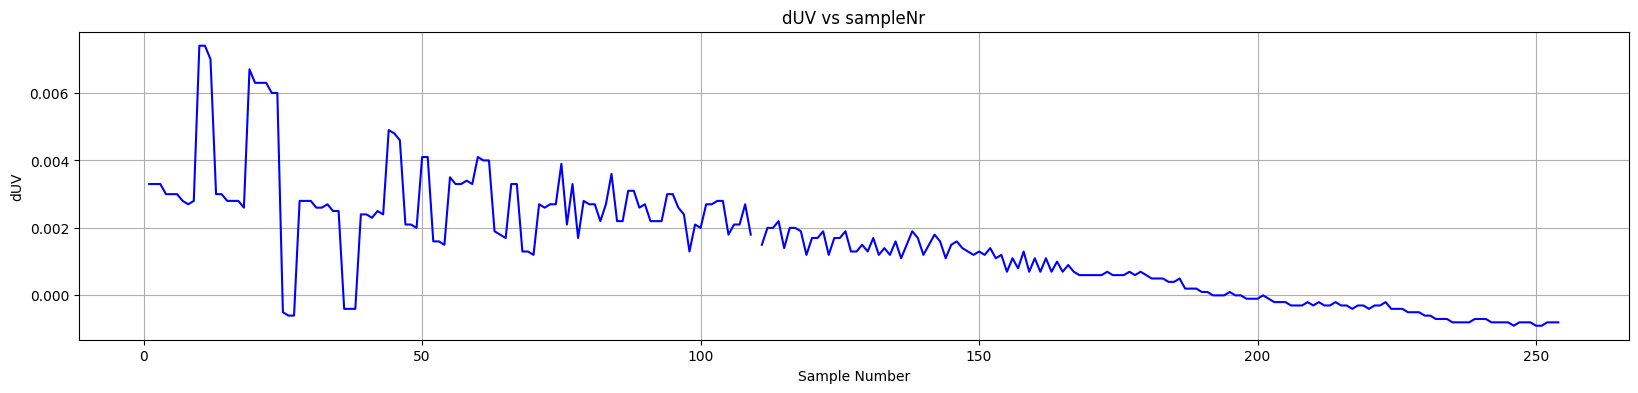

In [55]:
import matplotlib.pyplot as plt

data = df

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))
plt.plot(data['sampleNr'], data['dUV'], color='b')
plt.title('dUV vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('dUV')
plt.grid(True)

# Show the graph
plt.show()

In [54]:
lamp1.color = [10,50,10,100,0]
lamp1.update(rgbtMode=True)